In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import re
import nltk
import math
import os
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

%matplotlib inline


In [2]:
# data for mitochondrion protein sequences downloaded from uniprot.org
#from Bio import SeqIO
#seqID = []

#for seq_record in SeqIO.parse("nuclear_all.fasta", "fasta"):
    
    #print(seq_record.id)
    #seqID.append(seq_record.id)
    #print(repr(seq_record.seq))
    #print(len(seq_record))

In [3]:
from Bio import SeqIO
records1 = list(SeqIO.parse("nuclear1fasta.fasta", "fasta"))
print(records1[0].id)  # first record
print(records1[-1].id)  # last record

sp|P53762|ARNT_MOUSE
sp|O92446|VP91_NPVBM


In [4]:
records2 = list(SeqIO.parse("nuclear2.fasta", "fasta"))
print(records2[0].id)  # first record
print(records2[-1].id)  # last record

sp|P10589|COT1_HUMAN
sp|P24647|IE2_NPVAC


In [5]:
records3 = list(SeqIO.parse("nuclear3.fasta", "fasta"))
print(records3[0].id)  # first record
print(records3[-1].id)  # last record

sp|O97952|ANDR_MACFA
sp|P25783|CATV_NPVAC


In [6]:
records4 = list(SeqIO.parse("nuclear4.fasta", "fasta"))
print(records4[0].id)  # first record
print(records4[-1].id)  # last record

sp|Q9S7C9|AHL27_ARATH
sp|P24307|HELI_NPVAC


In [7]:
records = records1 + records2+ records3+ records4

In [8]:
seqID = []
for item in records:
    seqID.append(item.id)
    print(item.id)
    print()

sp|P53762|ARNT_MOUSE

sp|Q8VDF2|UHRF1_MOUSE

sp|Q04206|TF65_HUMAN

sp|Q6ZWQ0|SYNE2_MOUSE

sp|O09018|COT2_RAT

sp|P52298|NCBP2_HUMAN

sp|Q9JL19|NCOA6_MOUSE

sp|P49312|ROA1_MOUSE

sp|Q02780|NFIA_MOUSE

sp|Q9ERH7|HIPK3_MOUSE

sp|Q9WTK5|NFKB2_MOUSE

sp|P09651|ROA1_HUMAN

sp|Q9VZ23|RAN_DROME

sp|P49743|RXRB_RAT

sp|Q8NF91|SYNE1_HUMAN

sp|Q8WU68|U2AF4_HUMAN

sp|Q15696|U2AFM_HUMAN

sp|Q04207|TF65_MOUSE

sp|O75469|NR1I2_HUMAN

sp|Q9QZB6|NR4A3_MOUSE

sp|P70365|NCOA1_MOUSE

sp|Q8NI08|NCOA7_HUMAN

sp|Q00839|HNRPU_HUMAN

sp|Q14980|NUMA1_HUMAN

sp|Q60674|NR1D2_MOUSE

sp|Q60644|NR1H2_MOUSE

sp|P48552|NRIP1_HUMAN

sp|Q505F1|NR2C1_MOUSE

sp|Q24142|HR78_DROME

sp|O15111|IKKA_HUMAN

sp|Q09161|NCBP1_HUMAN

sp|P52301|RAN_XENLA

sp|Q6XW15|POLG_BTMV

sp|Q06219|NR4A2_MOUSE

sp|Q07917|NR4A2_RAT

sp|P43354|NR4A2_HUMAN

sp|Q5D869|NRPE1_ARATH

sp|Q14207|NPAT_HUMAN

sp|P23708|NFYA_MOUSE

sp|P45446|RORB_RAT

sp|Q14995|NR1D2_HUMAN

sp|P49117|NR2C2_MOUSE

sp|P25799|NFKB1_MOUSE

sp|Q9QXZ7|NR2E3_MOUSE

sp|Q96HA1|P121A

sp|Q15327|ANKR1_HUMAN

sp|Q92688|AN32B_HUMAN

sp|Q9EST5|AN32B_MOUSE

sp|Q8TAD8|SNIP1_HUMAN

sp|Q9H2G4|TSYL2_HUMAN

sp|Q9BTT0|AN32E_HUMAN

sp|P28659|CELF1_MOUSE

sp|Q92879|CELF1_HUMAN

sp|Q96LA8|ANM6_HUMAN

sp|O15945|ARNT_DROME

sp|Q12802|AKP13_HUMAN

sp|Q8RXN6|PRP31_ARATH

sp|Q12986|NFX1_HUMAN

sp|Q13151|ROA0_HUMAN

sp|Q9CZA6|NDE1_MOUSE

sp|Q9CQG2|MET16_MOUSE

sp|Q0J7P4|HD5_ORYSJ

sp|Q9NUN5|LMBD1_HUMAN

sp|O23523|RGGA_ARATH

sp|Q9WV02|RBMX_MOUSE

sp|Q4PSE2|NFYC8_ARATH

sp|O08750|NFIL3_MOUSE

sp|P07909|ROA1_DROME

sp|Q96P16|RPR1A_HUMAN

sp|P51991|ROA3_HUMAN

sp|Q9NXR1|NDE1_HUMAN

sp|Q9ES39|NDE1_RAT

sp|Q96LT9|RNPC3_HUMAN

sp|Q6URK4|ROA3_RAT

sp|Q99KP6|PRP19_MOUSE

sp|Q84W66|NFYB6_ARATH

sp|P48809|RB27C_DROME

sp|Q06546|GABPA_HUMAN

sp|Q00438|PTBP1_RAT

sp|Q13772|NCOA4_HUMAN

sp|Q8CGB3|UACA_MOUSE

sp|Q8BHJ5|TBL1R_MOUSE

sp|P27641|XRCC5_MOUSE

sp|P61457|PHS_HUMAN

sp|P39990|SNU13_YEAST

sp|Q08473|SQD_DROME

sp|P32597|STH1_YEAST

sp|O35235|TNF11_MOUSE

sp|Q15365|PCBP1_HUMAN

sp|Q99729|ROAA

In [9]:
print(len(seqID))

1000


In [10]:
for item in seqID:
    print(item)
    print()

sp|P53762|ARNT_MOUSE

sp|Q8VDF2|UHRF1_MOUSE

sp|Q04206|TF65_HUMAN

sp|Q6ZWQ0|SYNE2_MOUSE

sp|O09018|COT2_RAT

sp|P52298|NCBP2_HUMAN

sp|Q9JL19|NCOA6_MOUSE

sp|P49312|ROA1_MOUSE

sp|Q02780|NFIA_MOUSE

sp|Q9ERH7|HIPK3_MOUSE

sp|Q9WTK5|NFKB2_MOUSE

sp|P09651|ROA1_HUMAN

sp|Q9VZ23|RAN_DROME

sp|P49743|RXRB_RAT

sp|Q8NF91|SYNE1_HUMAN

sp|Q8WU68|U2AF4_HUMAN

sp|Q15696|U2AFM_HUMAN

sp|Q04207|TF65_MOUSE

sp|O75469|NR1I2_HUMAN

sp|Q9QZB6|NR4A3_MOUSE

sp|P70365|NCOA1_MOUSE

sp|Q8NI08|NCOA7_HUMAN

sp|Q00839|HNRPU_HUMAN

sp|Q14980|NUMA1_HUMAN

sp|Q60674|NR1D2_MOUSE

sp|Q60644|NR1H2_MOUSE

sp|P48552|NRIP1_HUMAN

sp|Q505F1|NR2C1_MOUSE

sp|Q24142|HR78_DROME

sp|O15111|IKKA_HUMAN

sp|Q09161|NCBP1_HUMAN

sp|P52301|RAN_XENLA

sp|Q6XW15|POLG_BTMV

sp|Q06219|NR4A2_MOUSE

sp|Q07917|NR4A2_RAT

sp|P43354|NR4A2_HUMAN

sp|Q5D869|NRPE1_ARATH

sp|Q14207|NPAT_HUMAN

sp|P23708|NFYA_MOUSE

sp|P45446|RORB_RAT

sp|Q14995|NR1D2_HUMAN

sp|P49117|NR2C2_MOUSE

sp|P25799|NFKB1_MOUSE

sp|Q9QXZ7|NR2E3_MOUSE

sp|Q96HA1|P121A

sp|Q15327|ANKR1_HUMAN

sp|Q92688|AN32B_HUMAN

sp|Q9EST5|AN32B_MOUSE

sp|Q8TAD8|SNIP1_HUMAN

sp|Q9H2G4|TSYL2_HUMAN

sp|Q9BTT0|AN32E_HUMAN

sp|P28659|CELF1_MOUSE

sp|Q92879|CELF1_HUMAN

sp|Q96LA8|ANM6_HUMAN

sp|O15945|ARNT_DROME

sp|Q12802|AKP13_HUMAN

sp|Q8RXN6|PRP31_ARATH

sp|Q12986|NFX1_HUMAN

sp|Q13151|ROA0_HUMAN

sp|Q9CZA6|NDE1_MOUSE

sp|Q9CQG2|MET16_MOUSE

sp|Q0J7P4|HD5_ORYSJ

sp|Q9NUN5|LMBD1_HUMAN

sp|O23523|RGGA_ARATH

sp|Q9WV02|RBMX_MOUSE

sp|Q4PSE2|NFYC8_ARATH

sp|O08750|NFIL3_MOUSE

sp|P07909|ROA1_DROME

sp|Q96P16|RPR1A_HUMAN

sp|P51991|ROA3_HUMAN

sp|Q9NXR1|NDE1_HUMAN

sp|Q9ES39|NDE1_RAT

sp|Q96LT9|RNPC3_HUMAN

sp|Q6URK4|ROA3_RAT

sp|Q99KP6|PRP19_MOUSE

sp|Q84W66|NFYB6_ARATH

sp|P48809|RB27C_DROME

sp|Q06546|GABPA_HUMAN

sp|Q00438|PTBP1_RAT

sp|Q13772|NCOA4_HUMAN

sp|Q8CGB3|UACA_MOUSE

sp|Q8BHJ5|TBL1R_MOUSE

sp|P27641|XRCC5_MOUSE

sp|P61457|PHS_HUMAN

sp|P39990|SNU13_YEAST

sp|Q08473|SQD_DROME

sp|P32597|STH1_YEAST

sp|O35235|TNF11_MOUSE

sp|Q15365|PCBP1_HUMAN

sp|Q99729|ROAA

In [11]:
def fasta_parser(filename):
    if os.path.exists(filename):
        pass
    else:                     
        print("The file, %s, does not exist" % filename)
        
    file = open(filename,mode='r')
    rec_all = file.read()
    file.close()
    # remove all whitespace from string all_of_it
    rec_all = rec_all.replace(' ','')
    # split records by > 
    records = rec_all.split('>')
    # Parse out the headers & sequences for each record
    headers = []
    sequences = []
    for rec in records:
        s = ''
        data = rec.split('\n')
        sq = s.join(data[1:])
        if len(data[0]) > 0:
            headers.append(data[0])
   
        if (len(sq) > 0):
            sequences.append(s.join(data[1:]))
    
    return headers, sequences

In [12]:
nuc_head1, nuc_seqs1 = fasta_parser('nuclear1fasta.fasta')
nuc_head2, nuc_seqs2 = fasta_parser('nuclear2.fasta')
nuc_head3, nuc_seqs3 = fasta_parser('nuclear2.fasta')
nuc_head4, nuc_seqs4 = fasta_parser('nuclear4.fasta')

In [13]:
nuc_head = nuc_head1 +nuc_head2 + nuc_head3 + nuc_head4
nuc_seqs = nuc_seqs1 +nuc_seqs2 + nuc_seqs3 + nuc_seqs4

In [14]:
for item in nuc_head:
    print(item)
    print()

sp|P53762|ARNT_MOUSEArylhydrocarbonreceptornucleartranslocatorOS=MusmusculusOX=10090GN=ArntPE=1SV=3

sp|Q8VDF2|UHRF1_MOUSEE3ubiquitin-proteinligaseUHRF1OS=MusmusculusOX=10090GN=Uhrf1PE=1SV=2

sp|Q04206|TF65_HUMANTranscriptionfactorp65OS=HomosapiensOX=9606GN=RELAPE=1SV=2

sp|Q6ZWQ0|SYNE2_MOUSENesprin-2OS=MusmusculusOX=10090GN=Syne2PE=1SV=2

sp|O09018|COT2_RATCOUPtranscriptionfactor2OS=RattusnorvegicusOX=10116GN=Nr2f2PE=1SV=1

sp|P52298|NCBP2_HUMANNuclearcap-bindingproteinsubunit2OS=HomosapiensOX=9606GN=NCBP2PE=1SV=1

sp|Q9JL19|NCOA6_MOUSENuclearreceptorcoactivator6OS=MusmusculusOX=10090GN=Ncoa6PE=1SV=1

sp|P49312|ROA1_MOUSEHeterogeneousnuclearribonucleoproteinA1OS=MusmusculusOX=10090GN=Hnrnpa1PE=1SV=2

sp|Q02780|NFIA_MOUSENuclearfactor1A-typeOS=MusmusculusOX=10090GN=NfiaPE=1SV=1

sp|Q9ERH7|HIPK3_MOUSEHomeodomain-interactingproteinkinase3OS=MusmusculusOX=10090GN=Hipk3PE=1SV=3

sp|Q9WTK5|NFKB2_MOUSENuclearfactorNF-kappa-Bp100subunitOS=MusmusculusOX=10090GN=Nfkb2PE=1SV=1

sp|P09651|ROA1_HU


sp|Q9V463|NU154_DROMENuclearporecomplexproteinNup154OS=DrosophilamelanogasterOX=7227GN=Nup154PE=1SV=1

sp|P40477|NU159_YEASTNucleoporinNUP159OS=Saccharomycescerevisiae(strainATCC204508/S288c)OX=559292GN=NUP159PE=1SV=1

sp|P07910|HNRPC_HUMANHeterogeneousnuclearribonucleoproteinsC1/C2OS=HomosapiensOX=9606GN=HNRNPCPE=1SV=4

sp|O95644|NFAC1_HUMANNuclearfactorofactivatedT-cells,cytoplasmic1OS=HomosapiensOX=9606GN=NFATC1PE=1SV=3

sp|O94916|NFAT5_HUMANNuclearfactorofactivatedT-cells5OS=HomosapiensOX=9606GN=NFAT5PE=1SV=1

sp|P49791|NU153_RATNuclearporecomplexproteinNup153OS=RattusnorvegicusOX=10116GN=Nup153PE=1SV=1

sp|P70582|NUP54_RATNuclearporecomplexproteinNup54OS=RattusnorvegicusOX=10116GN=Nup54PE=1SV=1

sp|Q9UTK4|NU189_SCHPONucleoporinnup189OS=Schizosaccharomycespombe(strain972/ATCC24843)OX=284812GN=nup189PE=1SV=2

sp|Q14149|MORC3_HUMANMORCfamilyCW-typezincfingerprotein3OS=HomosapiensOX=9606GN=MORC3PE=1SV=3

sp|Q86Z02|HIPK1_HUMANHomeodomain-interactingproteinkinase1OS=HomosapiensOX=9606G

sp|P23204|PPARA_MOUSEPeroxisomeproliferator-activatedreceptoralphaOS=MusmusculusOX=10090GN=PparaPE=1SV=2

sp|P36161|NU133_YEASTNucleoporinNUP133OS=Saccharomycescerevisiae(strainATCC204508/S288c)OX=559292GN=NUP133PE=1SV=1

sp|Q68FK8|DHX9_XENLAATP-dependentRNAhelicaseAproteinOS=XenopuslaevisOX=8355GN=dhx9PE=2SV=1

sp|Q13469|NFAC2_HUMANNuclearfactorofactivatedT-cells,cytoplasmic2OS=HomosapiensOX=9606GN=NFATC2PE=1SV=2

sp|P49686|NUP42_YEASTNucleoporinNUP42OS=Saccharomycescerevisiae(strainATCC204508/S288c)OX=559292GN=NUP42PE=1SV=1

sp|P49687|NU145_YEASTNucleoporinNUP145OS=Saccharomycescerevisiae(strainATCC204508/S288c)OX=559292GN=NUP145PE=1SV=1

sp|P37198|NUP62_HUMANNuclearporeglycoproteinp62OS=HomosapiensOX=9606GN=NUP62PE=1SV=3

sp|Q9Z0Y9|NR1H3_MOUSEOxysterolsreceptorLXR-alphaOS=MusmusculusOX=10090GN=Nr1h3PE=1SV=3

sp|Q60591|NFAC2_MOUSENuclearfactorofactivatedT-cells,cytoplasmic2OS=MusmusculusOX=10090GN=Nfatc2PE=1SV=3

sp|Q14934|NFAC4_HUMANNuclearfactorofactivatedT-cells,cytoplasmic4OS=Hom

In [15]:
for item in nuc_seqs:
    print(item)
    print()

MAATTANPEMTSDVPSLGPTIASGNPGPGIQGGGAVVQRAIKRRSGLDFDDEVEVNTKFLRCDDDQMCNDKERFARSDDEQSSADKERLARENHSEIERRRRNKMTAYITELSDMVPTCSALARKPDKLTILRMAVSHMKSLRGTGNTSTDGSYKPSFLTDQELKHLILEAADGFLFIVSCETGRVVYVSDSVTPVLNQPQSEWFGSTLYDQVHPDDVDKLREQLSTSENALTGRVLDLKTGTVKKEGQQSSMRMCMGSRRSFICRMRCGTSSVDPVSMNRLSFLRNRCRNGLGSVKEGEPHFVVVHCTGYIKAWPPAGVSLPDDDPEAGQGSKFCLVAIGRLQVTSSPNCTDMSNICQPTEFISRHNIEGIFTFVDHRCVATVGYQPQELLGKNIVEFCHPEDQQLLRDSFQQVVKLKGQVLSVMFRFRSKTREWLWMRTSSFTFQNPYSDEIEYIICTNTNVKNSSQEPRPTLSNTIPRSQLGPTANLSLEMGTGQLPSRQQQQQHTELDMVPGRDGLASYNHSQVSVQPVASAGSEHSKPLEKSEGLFAQDRDPRFPEIYPSITADQSKGISSSTVPATQQLFSQGSSFPPNPRPAENFRNSGLTPPVTIVQPSSSAGQILAQISRHSNPAQGSAPTWTSSSRPGFAAQQVPTQATAKTRSSQFGVNNFQTSSSFSAMSLPGAPTASSGTAAYPALPNRGSNFPPETGQTTGQFQARTAEGVGVWPQWQGQQPHHRSSSSEQHVQQTQAQAPSQPEVFQEMLSMLGDQSNTYNNEEFPDLTMFPPFSE

MWIQVRTMDGKETHTVNSLSRLTKVQELRKKIEEVFHVEPQLQRLFYRGKQMEDGHTLFDYDVRLNDTIQLLVRQSLALPLSTKERDSELSDSDSGYGVGHSESDKSSTHGEGAAEADDKTVWEDTDLGLYKVNEYVDVRDNIFGAWFEAQVVQVQKRALSEDEPCSSSAVKTSEDDIMYHVKYDDYPEHGVDIVKAKNVRARARTV

MSSLKDEVPTETSEDFGFKFLGQKQILPSFNEKLPFASLQNLDISNSKSLFVAASGSKAVVGELQLLRDHITSDSTPLTFKWEKEIPDVIFVCFHGDQVLVSTRNALYSLDLEELSEFRTVTSFEKPVFQLKNVNNTLVILNSVNDLSALDLRTKSTKQLAQNVTSFDVTNSQLAVLLKDRSFQSFAWRNGEMEKQFEFSLPSELEELPVEEYSPLSVTILSPQDFLAVFGNVISETDDEVSYDQKMYIIKHIDGSASFQETFDITPPFGQIVRFPYMYKVTLSGLIEPDANVNVLASSCSSEVSIWDSKQVIEPSQDSERAVLPISEETDKDTNPIGVAVDVVTSGTILEPCSGVDTIERLPLVYILNNEGSLQIVGLFHVAAIKSGHYSINLESLEHEKSLSPTSEKIPIAGQEQEEKKKNNESSKALSENPFTSANTSGFTFLKTQPAAANSLQSQSSSTFGAPSFGSSAFKIDLPSVSSTSTGVASSEQDATDPASAKPVFGKPAFGAIAKEPSTSEYAFGKPSFGAPSFGSGKSSVESPASGSAFGKPSFGTPSFGSGNSSVEPPASGSAFGKPSFGTPSFGSGNSSAEPPASGSAFGKPSFGTSAFGTASSNETNSGSIFGKAAFGSSSFAPANNELFGSNFTISKPTVDSPKEVDSTSPFPSSGDQSEDESKSDVDSSSTPFGTKPNTSTKPKTNAFDFGSSSFGSGFSKALESVGSDTTFKFGTQASPFSSQLGNKSPFSSFTKDDTENGSLSKGSTSEINDDNEEHESNGPNVSGNDLTDSTVEQTSSTRLPETPSDEDGEVVEEEAQKSPIGKLTETIKKSANIDMAGLKNPVFGNHVKAKSESPFSAFATNITKPSSTTPAFSFGNSTMNKSNTSTVSPMEEADTKETSEKGPITLKSVENPFLPAKEERTGESSKKDHNDDPKDGYVSGSEISVRTSESAFDTTANEEIPKSQDVNNHEKSETDPKYSQHAVVDHDNKSKEMNETSKN

MSSSGYPPNQGAFSTEQSRYPPHSVQYTFPNTRHQQEFAVPDYRSSHLEVSQASQLLQQQQQQQLRRRPSLLSEFHPGSDRPQERRTSYEPFHPGPSPVDHDSLESKRPRLEQVSDSHFQRVSAAVLPLVHPLPEGLRASADAKKDPAFGGKHEAPSSPISGQPCGDDQNASPSKLSKEELIQSMDRVDREIAKVEQQILKLKKKQQQLEEEAAKPPEPEKPVSPPPVEQKHRSIVQIIYDENRKKAEEAHKIFEGLGPKVELPLYNQPSDTKVYHENIKTNQVMRKKLILFFKRRNHARKQREQKICQRYDQLMEAWEKKVDRIENNPRRKAKESKTREYYEKQFPEIRKQREQQERFQRVGQRGAGLSATIARSEHEISEIIDGLSEQENNEKQMRQLSVIPPMMFDAEQRRVKFINMNGLMEDPMKVYKDRQFMNVWTDHEKEIFKDKFIQHPKNFGLIASYLERKSVPDCVLYYYLTKKNENYKALVRRNYGKRRGRNQQIARPSQEEKVEEKEEDKAEKTEKKEEEKKDEEEKDEKEDSKENTKEKDKIDGTAEETEEREQATPRGRKTANSQGRRKGRITRSMTNEAAAASAAAAAATEEPPPPLPPPPEPISTEPVETSRWTEEEMEVAKKGLVEHGRNWAAIAKMVGTKSEAQCKNFYFNYKRRHNLDNLLQQHKQKTSRKPREERDVSQCESVASTVSAQEDEDIEASNEEENPEDSEVEAVKPSEDSPENATSRGNTEPAVELEPTTETAPSTSPSLAVPSTKPAEDESVETQVNDSISAETAEQMDVDQQEHSAEEGSVCDPPPATKADSVDVEVRVPENHASKVEGDNTKERDLDRASEKVEPRDEDLVVAQQINAQRPEPQSDNDSSATCSADEDVDGEPERQRMFPMDSKPSLLNPTGSILVSSPLKPNPLDLPQLQHRAAVIPPMVSCTPCNIPIGTPVSGYALYQRHIKAMHESALLEEQRQRQEQIDLECRSSTSPCGTSKSP

MFASVELSSYRDQHFKGSRSEQERSLRDSCTLYVGNLSFYTTEEQIHELFSRCGDVRVIVMGLDKYKKTPCGFCFVEYYVRSEAEAAMRFVNGTRLDDRLIRVDWDAGFVEGRQYGRGKTGGQVRDEYRTDYDAGRGGYGKLLSQKIAPNTDNR

MKHLKRWWSAGGGLLHLTLLLSLAGLRVDLDLYLLLPPPTLLQDELLFLGGPASSAYALSPFSASGGWGRAGHLHPKGRELDPAAPPEGQLLREVRALGVPFVPRTSVDAWLVHSVAAGSADEAHGLLGAAAASSTGGAGASVDGGSQAVQGGGGDPRAARSGPLDAGEEEKAPAEPTAQVPDAGGCASEENGVLREKHEAVDHSSQHEENEERVSAQKENSLQQNDDDENKIAEKPDWEAEKTTESRNERHLNGTDTSFSLEDLFQLLSSQPENSLEGISLGDIPLPGSISDGMNSSAHYHVNFSQAISQDVNLHEAILLCPNNTFRRDPTARTSQSQEPFLQLNSHTTNPEQTLPGTNLTGFLSPVDNHMRNLTSQDLLYDLDINIFDEINLMSLATEDNFDPIDVSQLFDEPDSDSGLSLDSSHNNTSVIKSNSSHSVCDEGAIGYCTDHESSSHHDLEGAVGGYYPEPSKLCHLDQSDSDFHGDLTFQHVFHNHTYHLQPTAPESTSEPFPWPGKSQKIRSRYLEDTDRNLSRDEQRAKALHIPFSVDEIVGMPVDSFNSMLSRYYLTDLQVSLIRDIRRRGKNKVAAQNCRKRKLDIILNLEDDVCNLQAKKETLKREQAQCNKAINIMKQKLHDLYHDIFSRLRDDQGRPVNPNHYALQCTHDGSILIVPKELVASGHKKETQKGKRK

MEQTLAQAVSRRGKTNTPMAEERKPFSPMNFSANFVAPELFYSANVRKIKNIFRERSTTRFLDAISSDFELVAFLTLSPAHLMQLETTLRQEIRSCVVPIVTSDASFETVAVIKTALDGMRFHFGHTTLEKGWMSMMRHAESCLQESS

In [16]:
print(len(nuc_head))

1000


In [17]:
print(len(nuc_seqs))


1000


In [18]:
###################################################################################################################

## Create pandas dataframe using seqID & sequences

In [19]:
#d_mito = {'id':seqID,'sequence':mitoSeq}
d_nuc = {'name':seqID,'sequence':nuc_seqs}
d_nuc

{'name': ['sp|P53762|ARNT_MOUSE',
  'sp|Q8VDF2|UHRF1_MOUSE',
  'sp|Q04206|TF65_HUMAN',
  'sp|Q6ZWQ0|SYNE2_MOUSE',
  'sp|O09018|COT2_RAT',
  'sp|P52298|NCBP2_HUMAN',
  'sp|Q9JL19|NCOA6_MOUSE',
  'sp|P49312|ROA1_MOUSE',
  'sp|Q02780|NFIA_MOUSE',
  'sp|Q9ERH7|HIPK3_MOUSE',
  'sp|Q9WTK5|NFKB2_MOUSE',
  'sp|P09651|ROA1_HUMAN',
  'sp|Q9VZ23|RAN_DROME',
  'sp|P49743|RXRB_RAT',
  'sp|Q8NF91|SYNE1_HUMAN',
  'sp|Q8WU68|U2AF4_HUMAN',
  'sp|Q15696|U2AFM_HUMAN',
  'sp|Q04207|TF65_MOUSE',
  'sp|O75469|NR1I2_HUMAN',
  'sp|Q9QZB6|NR4A3_MOUSE',
  'sp|P70365|NCOA1_MOUSE',
  'sp|Q8NI08|NCOA7_HUMAN',
  'sp|Q00839|HNRPU_HUMAN',
  'sp|Q14980|NUMA1_HUMAN',
  'sp|Q60674|NR1D2_MOUSE',
  'sp|Q60644|NR1H2_MOUSE',
  'sp|P48552|NRIP1_HUMAN',
  'sp|Q505F1|NR2C1_MOUSE',
  'sp|Q24142|HR78_DROME',
  'sp|O15111|IKKA_HUMAN',
  'sp|Q09161|NCBP1_HUMAN',
  'sp|P52301|RAN_XENLA',
  'sp|Q6XW15|POLG_BTMV',
  'sp|Q06219|NR4A2_MOUSE',
  'sp|Q07917|NR4A2_RAT',
  'sp|P43354|NR4A2_HUMAN',
  'sp|Q5D869|NRPE1_ARATH',
  'sp|Q14207|NP

In [20]:
df = pd.DataFrame(d_nuc)

In [21]:
df.head()

,name,sequence
0,sp|P53762|ARNT_MOUSE,MAATTANPEMTSDVPSLGPTIASGNPGPGIQGGGAVVQRAIKRRSG...
1,sp|Q8VDF2|UHRF1_MOUSE,MWIQVRTMDGKETHTVNSLSRLTKVQELRKKIEEVFHVEPQLQRLF...
2,sp|Q04206|TF65_HUMAN,MDELFPLIFPAEPAQASGPYVEIIEQPKQRGMRFRYKCEGRSAGSI...
3,sp|Q6ZWQ0|SYNE2_MOUSE,MAASPVLPTEDGEGFLGIDDLHFSLQAEQEDTQKKTFTCWINSQLA...
4,sp|O09018|COT2_RAT,MAMVVSTWRDPQDEVPGSQGSQASQAPPVPGPPPGAPHTPQTPGQG...


In [22]:
df.tail()

,name,sequence
995,sp|P06545|P69_NPVAC,MVYRRRRRSSTGTTYGSTRRRRSSGYRRRPGRPRTYRRSRSRSSTG...
996,sp|P24656|PTP_NPVAC,MFPARWHNYLQCGQVIKDSNLICFKTPLRPELFAYVTSEEDVWTAE...
997,sp|O92503|VIE2_NPVBM,MSRQINAVTPSSSSRRHRLSLSRRRINFTTSPEALPSSSSRSQPSS...
998,sp|P04871|PYHD_NPVAC,MPDYSYRPTIGRTYVYDNKYYKNLGAVIKNAKRKKHFAEHEIEEAT...
999,sp|P24307|HELI_NPVAC,MIDNILQFFLKNVPQDKTYEINNLQDANHLIIRNTRTGTRRLFEYV...


In [23]:
df.dtypes

name        object
sequence    object
dtype: object

In [24]:
df.columns

Index(['name', 'sequence'], dtype='object')

In [25]:
df.shape

(1000, 2)

In [26]:
df.to_csv ('nuclear1000.csv', index = None)

In [27]:
df2 = pd.read_csv('nuclear1000.csv')

In [28]:
df2['label'] = 'nuclear.fasta'
df2['location'] = 7

In [29]:
df2.head()

,name,sequence,label,location
0,sp|P53762|ARNT_MOUSE,MAATTANPEMTSDVPSLGPTIASGNPGPGIQGGGAVVQRAIKRRSG...,nuclear.fasta,7
1,sp|Q8VDF2|UHRF1_MOUSE,MWIQVRTMDGKETHTVNSLSRLTKVQELRKKIEEVFHVEPQLQRLF...,nuclear.fasta,7
2,sp|Q04206|TF65_HUMAN,MDELFPLIFPAEPAQASGPYVEIIEQPKQRGMRFRYKCEGRSAGSI...,nuclear.fasta,7
3,sp|Q6ZWQ0|SYNE2_MOUSE,MAASPVLPTEDGEGFLGIDDLHFSLQAEQEDTQKKTFTCWINSQLA...,nuclear.fasta,7
4,sp|O09018|COT2_RAT,MAMVVSTWRDPQDEVPGSQGSQASQAPPVPGPPPGAPHTPQTPGQG...,nuclear.fasta,7


In [30]:
df2.tail()

,name,sequence,label,location
995,sp|P06545|P69_NPVAC,MVYRRRRRSSTGTTYGSTRRRRSSGYRRRPGRPRTYRRSRSRSSTG...,nuclear.fasta,7
996,sp|P24656|PTP_NPVAC,MFPARWHNYLQCGQVIKDSNLICFKTPLRPELFAYVTSEEDVWTAE...,nuclear.fasta,7
997,sp|O92503|VIE2_NPVBM,MSRQINAVTPSSSSRRHRLSLSRRRINFTTSPEALPSSSSRSQPSS...,nuclear.fasta,7
998,sp|P04871|PYHD_NPVAC,MPDYSYRPTIGRTYVYDNKYYKNLGAVIKNAKRKKHFAEHEIEEAT...,nuclear.fasta,7
999,sp|P24307|HELI_NPVAC,MIDNILQFFLKNVPQDKTYEINNLQDANHLIIRNTRTGTRRLFEYV...,nuclear.fasta,7


In [31]:
df2.shape

(1000, 4)

In [32]:
df2.columns

Index(['name', 'sequence', 'label', 'location'], dtype='object')

In [33]:
# upload additional 500 mitochondrial protein sequences
df3 = pd.read_csv('mito500.csv')

# create columns in df3
df3['label'] = 'mitochondrial.fasta'
df3['location'] = 6

df3.head()

,name,sequence,label,location
0,sp|P10719|ATPB_RAT,MLSLVGRVASASASGALRGLNPLAALPQAHLLLRTAPAGVHPARDY...,mitochondrial.fasta,6
1,sp|Q9BT30|ALKB7_HUMAN,MAGTGLLALRTLPGPSWVRGSGPSVLSRLQDAAVVRPGFLSTAEEE...,mitochondrial.fasta,6
2,sp|Q9MZE0|C1QBP_CHLAE,MLPLLRCVPRVLGSAVPSLRAAAPASPFRQLLTPGPRLCARPFGLL...,mitochondrial.fasta,6
3,sp|O35796|C1QBP_RAT,MLPLLRCVPRALGAAATGLRASIPAPPLRHLLQPAPRPCLRPFGLL...,mitochondrial.fasta,6
4,sp|P63039|CH60_RAT,MLRLPTVLRQMRPVSRALAPHLTRAYAKDVKFGADARALMLQGVDL...,mitochondrial.fasta,6


In [34]:
# data downloaded from kaggle
# https://www.kaggle.com/lzyacht/proteinsubcellularlocalization/downloads/proteinsubcellularlocalization.zip/1
# data is from SWISS-PROT database release 42 (2003–2004)
df = pd.read_csv('proteinsLocations.csv')

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.label)
df['location'] = le.transform(df['label'])

df.head(3)

,label,name,sequence,location
0,chloroplast.fasta,P46644 cTP 43,MKTTHSSSSSSDRRGARHNSGSDSDNSSYASTSGGTGGSVSHVADG...,2
1,chloroplast.fasta,P46248 cTP 52,MASMSGSTSRNKDKKGTSASNKAKSSRVTMTVAVKSRGTMADGVSA...,2
2,chloroplast.fasta,Q96375 cTP 49,MYASSARDGGKWCNARRKSKDAYHSCKSNGHKKVKGVKATAAATTK...,2


In [35]:
df.shape

(5959, 4)

In [36]:
df.label.value_counts()

cytoplasmic.fasta        1411
plasma_membrane.fasta    1238
extracellular.fasta       843
nuclear.fasta             837
mitochondrial.fasta       510
chloroplast.fasta         449
ER.fasta                  198
peroxisomal.fasta         157
Golgi.fasta               150
lysosomal.fasta           103
vacuolar.fasta             63
Name: label, dtype: int64

In [37]:
df.columns

Index(['label', 'name', 'sequence', 'location'], dtype='object')

In [38]:
proteins = pd.concat([df,df2,df3])
proteins.head()

/Users/scottlew/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,label,location,name,sequence
0,chloroplast.fasta,2,P46644 cTP 43,MKTTHSSSSSSDRRGARHNSGSDSDNSSYASTSGGTGGSVSHVADG...
1,chloroplast.fasta,2,P46248 cTP 52,MASMSGSTSRNKDKKGTSASNKAKSSRVTMTVAVKSRGTMADGVSA...
2,chloroplast.fasta,2,Q96375 cTP 49,MYASSARDGGKWCNARRKSKDAYHSCKSNGHKKVKGVKATAAATTK...
3,chloroplast.fasta,2,O81360 cTP 50,MASTYNSMNSAAVSRTHNKDSCHTDYHRSRTRSGKKCTVRATVAST...
4,chloroplast.fasta,2,P93092 cTP 52,MASVTGTSSMASKASASRVSNRSVSKGKSARMRSARVVCCAAKTVK...


In [39]:
proteins.shape

(7459, 4)

In [40]:
proteins.location.value_counts()

7     1837
3     1411
9     1238
6     1010
4      843
2      449
0      198
8      157
1      150
5      103
10      63
Name: location, dtype: int64

## Quartenary Classification

In [41]:
mask = ((proteins.location == 3) | (proteins.location == 9) | (proteins.location == 7)| (proteins.location == 6))
#mask = ((df.location == 3) | (df.location == 6))
data = proteins[mask]
data.head()

,label,location,name,sequence
449,cytoplasmic.fasta,3,P31946,TMDKSVKAKAARYDDMAAAMKAVTGHSNRNSVAYKNVVGARRSSWR...
450,cytoplasmic.fasta,3,P42655,MDDRDVYAKAARYDMVSMKKVAGMDVTVRNSVAYKNVGARRASWRS...
451,cytoplasmic.fasta,3,P35214,VDRVKARAARYDDMAAAMKNVTNSNRNSVAYKNVVGARRSSWRVSS...
452,cytoplasmic.fasta,3,Q91896,MDKNVKAKAARYDDMAACMKRVTGGSNRNSVAYKNVVGARRSSWRV...
453,cytoplasmic.fasta,3,Q15172,MSSSSAGAASAASASKVDGTRKSVRKARKRSGSSRSGSAHKDATSN...


In [42]:
data.tail()

,label,location,name,sequence
495,mitochondrial.fasta,6,sp|Q9Y2R9|RT07_HUMAN,MAAPAVKVARGWSGLALGVRRAVLQLPGLTQVRWSRYSPEFKDPLI...
496,mitochondrial.fasta,6,sp|Q9DCC8|TOM20_MOUSE,MVGRNSAIAAGVCGALFIGYCIYFDRKRRSDPNFKNRLRERRKKQK...
497,mitochondrial.fasta,6,sp|P32830|TIM12_YEAST,MSFFLNSLRGNQEVSQEKLDVAGVQFDAMCSTFNNILSTCLEKCIP...
498,mitochondrial.fasta,6,sp|Q9NVS2|RT18A_HUMAN,MAALKALVSGCGRLLRGLLAGPAATSWSRLPARGFREVVETQEGKT...
499,mitochondrial.fasta,6,sp|P49406|RM19_HUMAN,MAACIAAGHWAAMGLGRSFQAARTLLPPPASIACRVHAGPVRQQST...


In [43]:
data.location.value_counts()

7    1837
3    1411
9    1238
6    1010
Name: location, dtype: int64

## Transform the protein sequence data with CountVectorizer to get peptide frequency. Split the data into training & test sets.

In [44]:
# In this case, tripeptide frequency is used for analysis
#vect = CountVectorizer(min_df=1,token_pattern=r'\w{1}',ngram_range=(3,3))
vect = CountVectorizer(min_df=1,token_pattern=r'\w{1}',ngram_range=(4,4))

In [45]:
X = vect.fit_transform(data.sequence)
y = data.location

In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4396, 135682) (4396,)
(1100, 135682) (1100,)


In [47]:
y_test.value_counts()

7    360
3    296
9    242
6    202
Name: location, dtype: int64

## Logistic Regression Model

In [48]:
# Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
print("Logistic Regression Score: {:.2f}".format(lr.score(X_test, y_test)))

/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Score: 0.82


In [49]:
# Generate Confusion Matrix for Logistic Regression
actual = y_test
predictions = lr.predict(X_test)
print('Confusion Matrix for Logistic Regression Model')
print()
cm = confusion_matrix(actual,predictions)
print(cm)

Confusion Matrix for Logistic Regression Model

[[225  18  27  26]
 [ 44 136  21   1]
 [ 25   7 320   8]
 [ 20   2   3 217]]


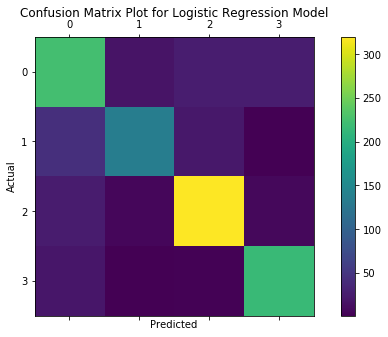

In [50]:
# Nice plot of confusion matrix
# Adjust size of confusion matrix by following code taken from StackOverflow
# https://stackoverflow.com/questions/43021762/matplotlib-how-to-change-figsize-for-matshow
plt.figure(figsize=(10,5))
plt.matshow(cm, fignum=1)

plt.title('Confusion Matrix Plot for Logistic Regression Model')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

## Decision Tree Model

In [51]:
from sklearn.tree import DecisionTreeClassifier
#dtc = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
dtc = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
predictions = dtc.predict(X_test)
print("Decision Tree Classifier Score: {:.2f}".format(dtc.score(X_test, y_test)))

Decision Tree Classifier Score: 0.57


In [52]:
# Generate Confusion Matrix for Decision Tree Classifier
actual = y_test
predictions = dtc.predict(X_test)
print('Confusion Matrix for Decision Tree Model')
print()
cm = confusion_matrix(actual,predictions)
print(cm)

Confusion Matrix for Decision Tree Model

[[134  53  54  55]
 [ 56  83  37  26]
 [ 34  26 270  30]
 [ 46  26  31 139]]


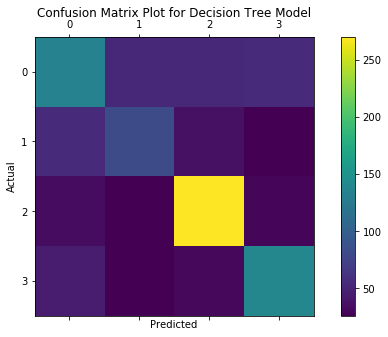

In [53]:
# plot of confusion matrix
plt.figure(figsize=(10,5))
plt.matshow(cm, fignum=1)

plt.title('Confusion Matrix Plot for Decision Tree Model')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()